In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [3]:
df.shape

(1304, 1)

In [12]:
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset.
bottom = df['value'].quantile(0.025)
top = df['value'].quantile(0.975)

In [13]:
mask = (df['value'] > bottom) & (df['value'] < top)
df = df[mask]

In [14]:
df.shape

(1238, 1)

In [59]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(14, 4))

    ax.plot(df.index, df['value'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

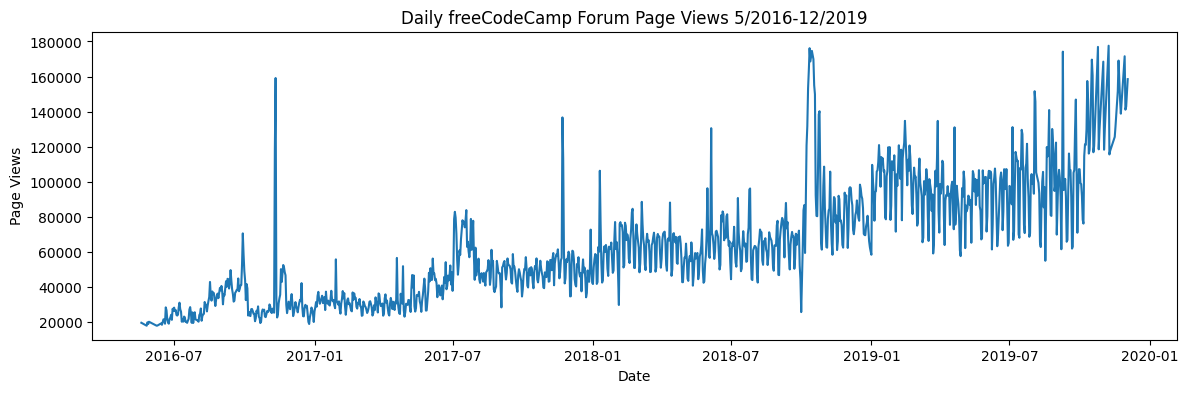

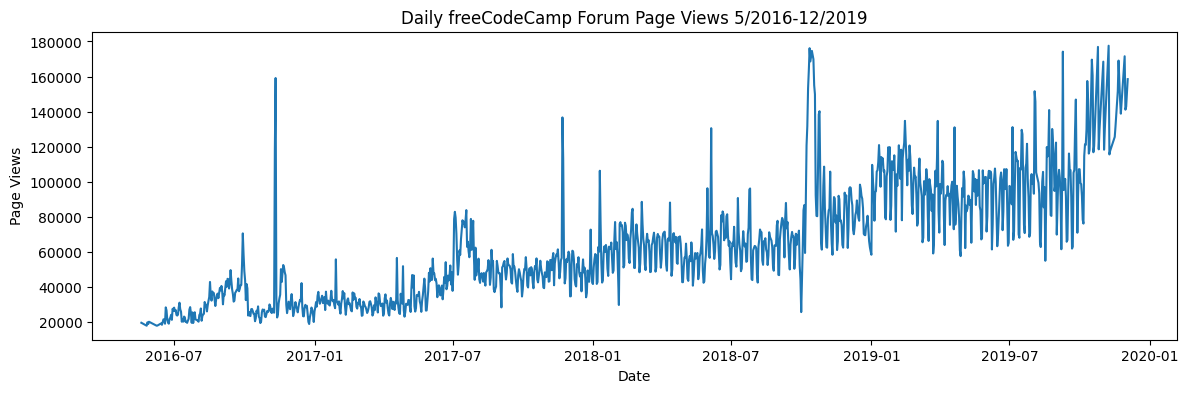

In [60]:
draw_line_plot()

In [28]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [135]:
df_bar = df.pivot_table(index=df.index.year, columns=df.index.strftime('%B'), values='value', aggfunc='mean')
df_bar = df_bar[months]
df_bar

date,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


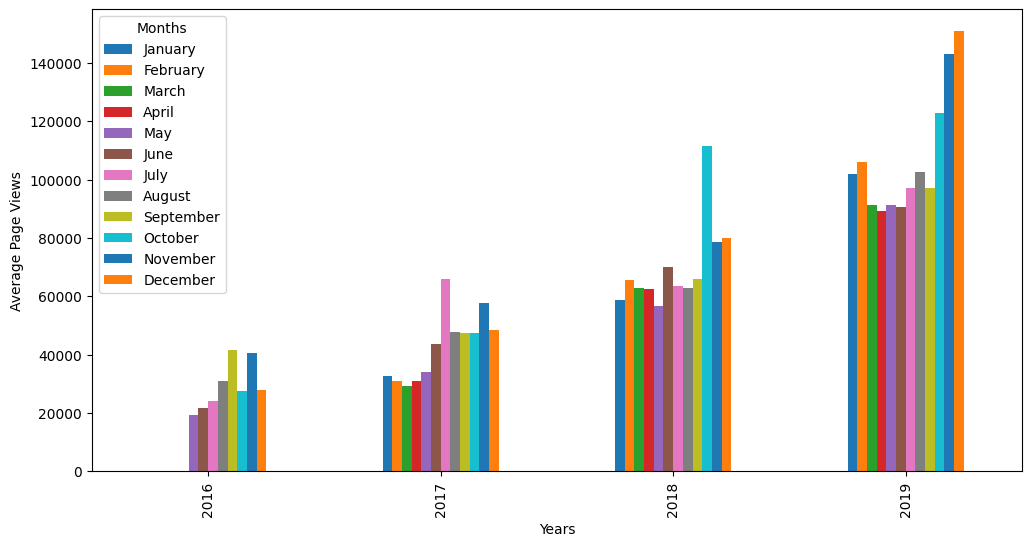

In [133]:
fix, ax = plt.subplots(figsize=(12, 6))
df_bar.plot.bar(xlabel='Years', ylabel='Average Page Views', ax=ax, label='Months')
ax.legend(title='Months')

## TODO

Bar chart 

- [ ] capture example of how to use `DataFrame.plot` on a fig/ax
- [ ] setting legend title
- [ ] copy and run tests
- [ ] review solution in [this article](https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a)

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [38]:
# def draw_box_plot():
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [39]:
df_box.dtypes

date     datetime64[ns]
value             int64
year              int64
month            object
dtype: object

In [34]:
df_box.month.value_counts()

Aug    122
Jul    120
Sep    120
Oct    112
Jun    107
Nov    104
May     98
Dec     95
Jan     93
Mar     93
Apr     90
Feb     84
Name: month, dtype: int64

In [40]:
months_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_box['month'] = pd.Categorical(df_box['month'], categories=months_short, ordered=True)

In [42]:
df_box['month'].value_counts()

Aug    122
Jul    120
Sep    120
Oct    112
Jun    107
Nov    104
Dec     95
Jan     93
Mar     93
Apr     90
Feb     84
Name: month, dtype: int64

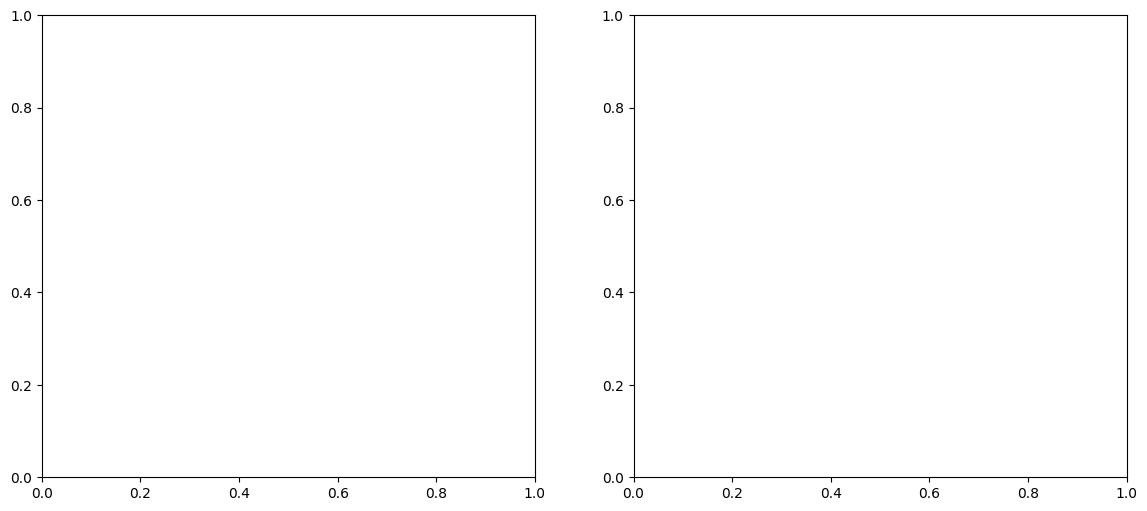

In [45]:
## Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
sns.boxplot(data=df_box, x='month', y='value', ax=ax2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')

fig

# Save image and return fig (don't change this part)
# fig.savefig('box_plot.png')
# return fig

In [46]:
df_box['month'].isnull().sum()

98

In [146]:
df_box['month'] = pd.Categorical(df_box['month'], categories=months)